# Uncertainty analysis of the critical head difference

In this example, we demonstrate how to perform an uncertainty analysis of a model. The goal of such an analysis is to estimate the uncertainty in the model output resulting from uncertain input parameters.

We focus on the critical head difference model according to Sellmeijer. This model is applicable to the piping failure mechanism, which describes backward internal erosion beneath dikes with horizontal seepage paths.

### Define model

First, let's import the necessary packages:

In [25]:
from probabilistic_library import UncertaintyProject, DistributionType, UncertaintyMethod

The critical head difference, $H_c$, according to the Sellmeijer's model is described by the following equations:

$F_{resistance}=\eta\cdot \frac{\gamma_{sub,particles}}{\gamma_{water}}\cdot \tan \theta_{sellmeijer,rev}$


$F_{scale}=\frac{d_{70.m}}{\sqrt[3]{\kappa\cdot L}}\cdot\left(\frac{d_{70}}{d_{70.m}}\right)^{0.4}$ and $\kappa = \frac{\nu_{water}}{g}\cdot k$


$F_{geometry}=0.91\cdot \left(\frac{D}{L}\right)^{\frac{0.28}{\left(\frac{D}{L}\right)^{2.8}-1}+0.04}$

$H_c = F_{resistance} \cdot F_{scale} \cdot F_{geometry} \cdot L$

where: <br>
$L$ - seepage length (m) <br>
$D$ - thickness of upper sand layer (m) <br>
$\theta$ - bedding angle ($\circ$) <br>
$d_{70}$ - particle diameter (m) <br>
$k$ - permeability of the upper sand layer (m/s)

In [26]:
from utils.models import model_sellmeijer
label_critical_head_diff = "critical head difference (m)"
label_pdf = "pdf (-)"

### Uncertainty analysis

We begin by creating an uncertainty project and defining the model:

In [27]:
project = UncertaintyProject()
project.model = model_sellmeijer

project.model.print()

Model model_sellmeijer:
Input parameters:
  k
  L
  d70
  D
Output parameters:
  delta_h_c


We define all the input parameters of the model as random variables:

In [28]:
project.variables["k"].distribution = DistributionType.log_normal
project.variables["k"].mean = 0.000245598
project.variables["k"].variation = 0.25

project.variables["L"].distribution = DistributionType.log_normal
project.variables["L"].mean = 40.0
project.variables["L"].variation = 0.25

project.variables["d70"].distribution = DistributionType.log_normal
project.variables["d70"].mean = 0.00019
project.variables["d70"].variation = 0.25

project.variables["D"].distribution = DistributionType.log_normal
project.variables["D"].mean = 30.0
project.variables["D"].variation = 0.25

Uncertainty analysis can be performed using one of the following methods: `crude_monte_carlo`, `numerical_integration`, `fosm`, `form`, `importance_sampling` or `directional_sampling`.

The results can be accessed from `project.stochast`.

### Crude Monte Carlo

Let's consider the `crude_monte_carlo` method:

Variable delta_h_c:
  distribution = histogram
Definition:
  amount[1.101, 1.157] = 2
  amount[1.157, 1.212] = 4
  amount[1.212, 1.268] = 8
  amount[1.268, 1.323] = 10
  amount[1.323, 1.379] = 14
  amount[1.379, 1.434] = 39
  amount[1.434, 1.49] = 38
  amount[1.49, 1.545] = 64
  amount[1.545, 1.601] = 74
  amount[1.601, 1.656] = 106
  amount[1.656, 1.712] = 99
  amount[1.712, 1.767] = 124
  amount[1.767, 1.822] = 103
  amount[1.822, 1.878] = 176
  amount[1.878, 1.933] = 155
  amount[1.933, 1.989] = 189
  amount[1.989, 2.044] = 180
  amount[2.044, 2.1] = 206
  amount[2.1, 2.155] = 212
  amount[2.155, 2.211] = 219
  amount[2.211, 2.266] = 217
  amount[2.266, 2.322] = 204
  amount[2.322, 2.377] = 206
  amount[2.377, 2.433] = 191
  amount[2.433, 2.488] = 191
  amount[2.488, 2.544] = 191
  amount[2.544, 2.599] = 173
  amount[2.599, 2.655] = 162
  amount[2.655, 2.71] = 127
  amount[2.71, 2.766] = 130
  amount[2.766, 2.821] = 102
  amount[2.821, 2.877] = 111
  amount[2.877, 2.932] = 100
  amo

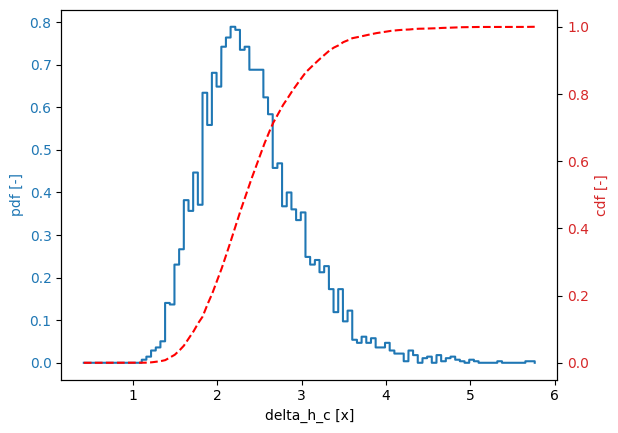

In [29]:
project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.minimum_samples = 4000
project.settings.maximum_samples = 5000

project.run()

uncer = project.stochast
uncer.print()
uncer.plot()

### FORM

The following code demonstrates the uncertainty analysis using `form`:

Variable delta_h_c:
  distribution = cdf_curve
Definition:
  beta[0.413] = -7.985
  beta[0.4571] = -7.487
  beta[0.5062] = -6.988
  beta[0.5607] = -6.49
  beta[0.6214] = -5.992
  beta[0.6891] = -5.493
  beta[0.7647] = -4.995
  beta[0.8492] = -4.496
  beta[0.9439] = -3.997
  beta[1.05] = -3.498
  beta[1.17] = -2.999
  beta[1.305] = -2.499
  beta[1.458] = -2
  beta[1.632] = -1.5
  beta[1.829] = -1
  beta[2.054] = -0.5
  beta[2.31] = 0
  beta[2.603] = 0.5
  beta[2.938] = 1
  beta[3.322] = 1.5
  beta[3.761] = 2
  beta[4.264] = 2.5
  beta[4.84] = 2.999
  beta[5.499] = 3.499
  beta[6.253] = 3.999
  beta[7.115] = 4.498
  beta[8.1] = 4.998
  beta[9.226] = 5.498
  beta[10.51] = 5.997
  beta[11.98] = 6.497
  beta[13.66] = 6.997
  beta[15.57] = 7.497
  beta[17.76] = 7.996
Derived values:
  mean = 2.388
  deviation = 0.5795
  variation = 0.2427


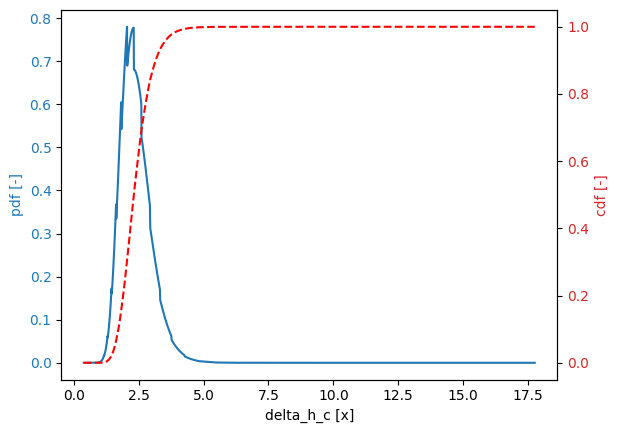

In [30]:
project.settings.uncertainty_method = UncertaintyMethod.form
project.settings.maximum_iterations = 50

project.run()

uncer = project.stochast
uncer.print()
uncer.plot()